In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
import pickle

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2] #784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [ ]:
param_grid = {'criterion': ["gini", "entropy"],
              'n_estimators': [15, 20],
              'max_features': ['sqrt', 'log2']}

rf = RandomForestClassifier(n_jobs=-1)
forest_grid = GridSearchCV(rf, param_grid, cv=10)
forest_grid.fit(X_train, y_train);
print(pd.DataFrame(forest_grid.cv_results_))

In [5]:
# choose good params based on GridSearch
# check generalization performance
rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_features='sqrt', criterion='gini')
print(cross_val_score(rf, X_train, y_train, cv=10))

KeyboardInterrupt: 

In [6]:
# generalized well, build classifier on all data
rf_best = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_features='sqrt', criterion='gini')
rf_best.fit(np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
with open('rf-model.pckl', 'wb') as f:
    pickle.dump(rf_best, f)

In [79]:
np.shape(X_train[0])

(784,)

In [83]:
rf.predict(X_train[0].reshape(1,-1))

array([5], dtype=uint8)

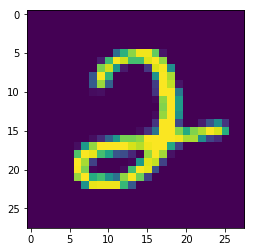

In [25]:
pixels = X_train[16]
plt.imshow(np.reshape(pixels, (28,28))) 
plt.show()

In [1]:
np.reshape(pixels, (28,28))

NameError: name 'np' is not defined